# **Classification Problems**

# **Credit Classification**

In [845]:
import pandas as pd
import numpy as np
credit_df=pd.read_csv('German Credit Data.csv')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [846]:
credit_df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [847]:
credit_df.iloc[0:5,1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [848]:
credit_df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [849]:
credit_df.status.value_counts()

,count
status,
0,700
1,300


In [850]:
# Good Credit(0)>Bad Credit(1)

In [851]:
X_features=list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

# Encoding Categorical Features

In [852]:
# one hot encoding
encoded_credit_df=pd.get_dummies(credit_df[X_features],drop_first=True)

In [853]:
#encoded_credit_df

In [854]:
#list(X_features)

In [855]:
list(encoded_credit_df)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [856]:
encoded_credit_df[['checkin_acc_A12','checkin_acc_A13','checkin_acc_A14']]

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,False,False,False
1,True,False,False
2,False,False,True
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,True
996,False,False,False
997,False,False,True
998,False,False,False


In [857]:
encoded_credit_df[['checkin_acc_A12','checkin_acc_A13','checkin_acc_A14']].astype(int)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0
...,...,...,...
995,0,0,1
996,0,0,0
997,0,0,1
998,0,0,0


In [858]:
import statsmodels.api as sm
Y=credit_df.status
# Convert boolean columns to integers before splitting
encoded_credit_df=encoded_credit_df.astype(int)
#Y
X=sm.add_constant(encoded_credit_df)
#X

In [859]:
Y

,status
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [860]:
X

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,1.0,6,1169,4,4,67,2,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,1.0,48,5951,2,2,22,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1.0,12,2096,2,3,49,1,0,0,1,...,1,0,0,1,0,0,1,1,0,0
3,1.0,42,7882,2,4,45,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1.0,24,4870,3,4,53,2,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,12,1736,3,4,31,1,0,0,1,...,1,0,1,0,0,0,1,1,0,0
996,1.0,30,3857,4,4,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,1.0,12,804,4,4,38,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
998,1.0,45,1845,4,4,23,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


# Splitting Dataset into Training and Test Sets

In [861]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

In [862]:
#X

In [863]:
#X_train.info()

In [864]:
#Y

In [865]:
#Y_train.info()

In [866]:
#Y_test.info()

# Building Logistic Regression Model

In [867]:
#Y_train

In [868]:
#X_train

In [869]:
import statsmodels.api as sm
logit=sm.Logit(Y_train,X_train)
logit_model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


# Printing Model Summary

In [870]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.198     
Date:                 2025-09-10 13:15  AIC:               744.5132  
No. Observations:     700               BIC:               881.0456  
Df Model:             29                Log-Likelihood:    -342.26   
Df Residuals:         670               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       1.0630e-21
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

# Model Diagnostics

In [871]:
#logit_model

In [872]:

#var_p_vals_df=pd.DataFrame(logit_model.pvalues)
#var_p_vals_df['vars']=var_p_vals_df.index
#var_p_vals_df.columns=['pvals','vars']
#list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])

In [873]:
def get_significant_vars(lm):
  var_p_vals_df=pd.DataFrame(lm.pvalues)
  var_p_vals_df['vars']=var_p_vals_df.index
  var_p_vals_df.columns=['pvals','vars']
  return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])

In [874]:
significant_vars=get_significant_vars(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [875]:
#Y_train

In [876]:
final_logit=sm.Logit(Y_train,sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [877]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  status           Pseudo R-squared: 0.161     
Date:                2025-09-10 13:15 AIC:              733.8898  
No. Observations:    700              BIC:              774.8495  
Df Model:            8                Log-Likelihood:   -357.94   
Df Residuals:        691              LL-Null:          -426.75   
Converged:           1.0000           LLR p-value:      7.4185e-26
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

# Predicting on Test Data

In [878]:
Y_pred_df=pd.DataFrame({
    "actual":Y_test,
    "predicted_prob":final_logit.predict(sm.add_constant(X_test[significant_vars]))
})

In [879]:
Y_pred_df

,actual,predicted_prob
521,1,0.452449
737,0,0.491820
740,0,0.418416
660,0,0.270285
411,0,0.132119
...,...,...
468,0,0.178787
935,1,0.587925
428,0,0.091998
7,0,0.571859


In [880]:
Y_pred_df.sample(10,random_state=42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [881]:
# cutoff value=0.5
Y_pred_df['predicted']=Y_pred_df.predicted_prob.map(lambda x: 1 if x>0.5 else 0)

In [882]:
Y_pred_df

,actual,predicted_prob,predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
...,...,...,...
468,0,0.178787,0
935,1,0.587925,1
428,0,0.091998,0
7,0,0.571859,1


In [883]:
Y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


# Creating a Confusion Matrix

In [884]:
# error Matrix
# classification table

In [885]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [886]:
#Y_pred_df.actual

In [887]:
#Y_pred_df.predicted

In [888]:
#cm=metrics.confusion_matrix(Y_pred_df.actual,Y_pred_df.predicted,labels=[1,0])
#sn.heatmap(cm,annot=True,fmt='.2f')

In [889]:
from sklearn import metrics
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted, labels=[1,0])
  sn.heatmap(cm,annot=True,fmt='.2f',
             xticklabels=["Bad Credit","Good Credit"],
             yticklabels=["Bad Credit","Good Credit"])
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

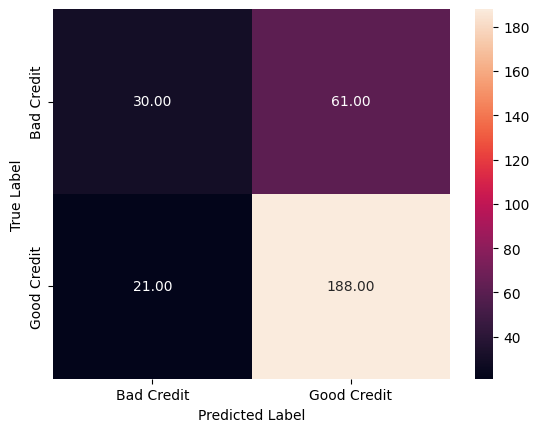

In [890]:
draw_cm(Y_pred_df.actual,
        Y_pred_df.predicted)

In [891]:
# Bad Credit=1
# Good credits=0

# TP=30 (1,1)
# TN=188 (0,0)
# FP=21 (0,1)
# FN=61 (1,0)

# Measuring Accuracies

In [892]:
# ability of model to predict correctly  positives and  sensitivity(or) Recall (or) True positive Rate(TPR)

In [893]:
#ability of model to predict correctly negatives is called specificity (or) True Negative Rate

In [894]:
# Sensitivity or Recall (True Positive Rate)= TP/(TP+FN)

In [895]:
# Specificity (True Negative Rate) = TN/(TN+FP)

In [896]:
# Precision= TP/(TP+FP)

In [897]:
# F-SCORE=(2*RECALL*PRECISION)/(RECALL+PRECISION)

In [898]:
print(metrics.classification_report(Y_pred_df.actual,
                                    Y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



The classification report provides a summary of the model's performance, broken down by class (0 for Good Credit and 1 for Bad Credit).

Here's a breakdown of the metrics:

*   **precision**: The ability of the classifier not to label as positive a sample that is negative.
    *   For class 0 (Good Credit): 0.76 - Out of all instances predicted as Good Credit, 76% were actually Good Credit.
    *   For class 1 (Bad Credit): 0.59 - Out of all instances predicted as Bad Credit, 59% were actually Bad Credit.

*   **recall**: The ability of the classifier to find all the positive samples. Also known as Sensitivity or True Positive Rate.
    *   For class 0 (Good Credit): 0.90 - Out of all actual Good Credit instances, the model correctly identified 90% of them.
    *   For class 1 (Bad Credit): 0.33 - Out of all actual Bad Credit instances, the model correctly identified only 33% of them.

*   **f1-score**: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
    *   For class 0 (Good Credit): 0.82
    *   For class 1 (Bad Credit): 0.42

*   **support**: The number of actual occurrences of each class in the test set.
    *   For class 0 (Good Credit): 209
    *   For class 1 (Bad Credit): 91

*   **accuracy**: The overall percentage of correctly predicted instances (both Good and Bad Credit). In this case, it's 0.73 (73%).

*   **macro avg**: The average of precision, recall, and f1-score across both classes, without considering class imbalance.

*   **weighted avg**: The average of precision, recall, and f1-score across both classes, weighted by the number of instances in each class. This is a more appropriate metric when dealing with imbalanced datasets like this one (700 Good Credit vs 300 Bad Credit in the training data, and 209 Good Credit vs 91 Bad Credit in the test data, as seen in the support values).

Based on these metrics, the model is much better at predicting Good Credit (class 0) than Bad Credit (class 1). The low recall for class 1 (0.33) indicates that the model misses a significant portion of actual Bad Credit cases.

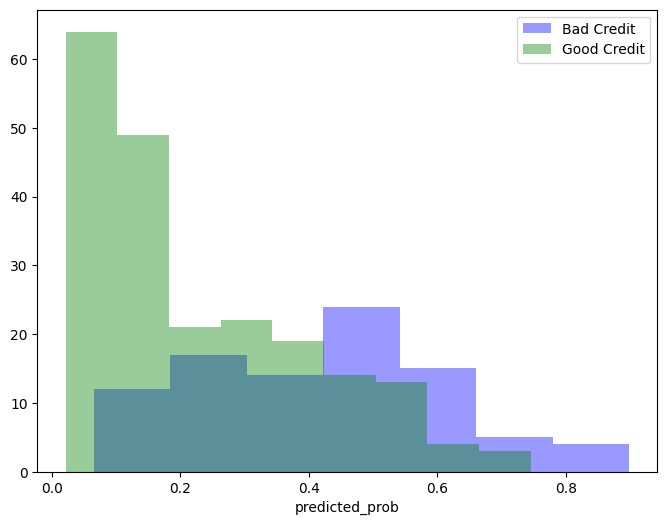

In [899]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
# Plotting distribution of predicted probability values for bad credits
sn.distplot(Y_pred_df[Y_pred_df.actual==1]["predicted_prob"],
            kde=False,
            color='b',
            label='Bad Credit')
# Plotting distribution of predicted probability values for good credits
sn.distplot(Y_pred_df[Y_pred_df.actual==0]["predicted_prob"],
            kde=False,
            color='g',
            label='Good Credit')
plt.legend()
plt.show()


# Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

In [900]:
# draw_roc= ROC CURVE
# metrics.roc_curve()= different thresholds
# metrics.roc_auc_score()= AUC

In [901]:
def draw_roc(actual,probs):
  # Obtain fpr, tpr, thresholds
  fpr,tpr,thresholds=metrics.roc_curve(actual,
                                       probs,
                                       drop_intermediate=False)
  auc_score=metrics.roc_auc_score(actual,probs)
  plt.figure(figsize=(8,6))
  # Plot the fpr and tpr values for different threshold values
  plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'%auc_score)
  # draw a diagonal line connecting the origin and top right most point
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  # Setting x and y labels
  plt.xlabel("False Positive Rate or [1-True Negative Rate]")
  plt.ylabel("True Positive Rate")
  plt.legend(loc="lower right")
  plt.show()


  return fpr,tpr,thresholds

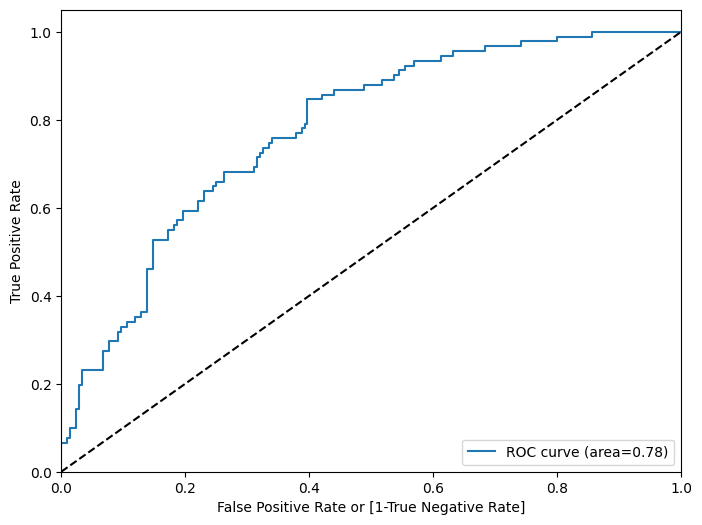

In [902]:
fpr,tpr,thresholds=draw_roc(Y_pred_df.actual,Y_pred_df.predicted_prob)

In [903]:
auc_score=metrics.roc_auc_score(Y_pred_df.actual,
                                Y_pred_df.predicted_prob)
round(float(auc_score),2)

0.78

# Finding Optimal Classification Cut-off

# Youden’s Index

In [910]:
tpr_fpr=pd.DataFrame({
    'tpr':tpr,
    'fpr':fpr,
    'thresholds':thresholds
})
#print(tpr_fpr)
tpr_fpr['diff']=tpr_fpr.tpr-tpr_fpr.fpr
#print(tpr_fpr)
tpr_fpr.sort_values('diff',ascending=False)[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [913]:
Y_pred_df['predicted_new']=Y_pred_df.predicted_prob.map(lambda x: 1 if x>0.22 else 0)
Y_pred_df

,actual,predicted_prob,predicted,predicted_new
521,1,0.452449,0,1
737,0,0.491820,0,1
740,0,0.418416,0,1
660,0,0.270285,0,1
411,0,0.132119,0,0
...,...,...,...,...
468,0,0.178787,0,0
935,1,0.587925,1,1
428,0,0.091998,0,0
7,0,0.571859,1,1


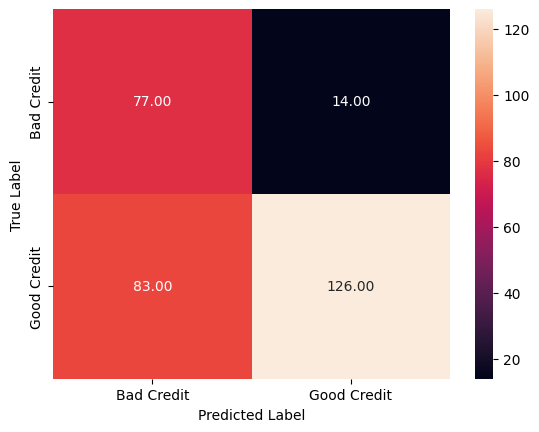

In [914]:
draw_cm(Y_pred_df.actual,Y_pred_df.predicted_new)

In [915]:
#Good Credit=0
#Bad Credit=1
# 77=TP (1,1)
# 126=TN (0,0)
# 83=FP (0,1)
# 14=FN (1,0)

In [916]:
print(metrics.classification_report(Y_pred_df.actual,Y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



This classification report provides a detailed breakdown of the model's performance after adjusting the classification cutoff to approximately 0.22 (based on Youden's Index from the ROC curve analysis).

Let's examine the metrics for each class (0 for Good Credit and 1 for Bad Credit):

**Class 0 (Good Credit):**
*   **precision (0.90):** Out of all instances that the model *predicted* as Good Credit, 90% were actually Good Credit. This is a high precision, meaning when the model predicts Good Credit, it's usually correct.
*   **recall (0.60):** Out of all instances that were *actually* Good Credit, the model correctly identified 60% of them. This is lower than the precision, indicating that the model misses some actual Good Credit cases and incorrectly classifies them as Bad Credit.
*   **f1-score (0.72):** The harmonic mean of precision and recall for Good Credit. This provides a balanced measure of the model's performance for this class.
*   **support (209):** There are 209 actual Good Credit instances in the test set.

**Class 1 (Bad Credit):**
*   **precision (0.48):** Out of all instances that the model *predicted* as Bad Credit, 48% were actually Bad Credit. This is significantly lower than the precision for Good Credit, meaning when the model predicts Bad Credit, there's a higher chance it's incorrect (it's actually Good Credit).
*   **recall (0.85):** Out of all instances that were *actually* Bad Credit, the model correctly identified 85% of them. This is a significant improvement compared to the previous cutoff of 0.5 (where recall was 0.33). This indicates that by lowering the cutoff, the model is much better at catching actual Bad Credit cases.
*   **f1-score (0.61):** The harmonic mean of precision and recall for Bad Credit. This score has improved compared to the previous cutoff.
*   **support (91):** There are 91 actual Bad Credit instances in the test set.

**Overall Metrics:**
*   **accuracy (0.68):** The overall percentage of correctly predicted instances across both classes is 68%. This is slightly lower than the accuracy with the 0.5 cutoff (0.73). This is expected when you adjust the cutoff to improve recall for the minority class; you often sacrifice some overall accuracy.
*   **macro avg (0.69 precision, 0.72 recall, 0.67 f1-score):** The average of the metrics for each class, treating both classes equally.
*   **weighted avg (0.77 precision, 0.68 recall, 0.69 f1-score):** The average of the metrics, weighted by the number of instances in each class. This is a more representative measure for this imbalanced dataset.

**Comparison with 0.5 Cutoff:**
By lowering the cutoff from 0.5 to approximately 0.22, we observe a trade-off:
*   **Improved Recall for Bad Credit:** The recall for class 1 (Bad Credit) increased substantially from 0.33 to 0.85. This means the model is now much better at identifying risky customers.
*   **Decreased Precision for Good Credit:** The precision for class 0 (Good Credit) decreased from 0.76 to 0.90. This means more actual Good Credit customers are being incorrectly flagged as Bad Credit.
*   **Decreased Overall Accuracy:** The overall accuracy slightly decreased.

The choice of cutoff depends on the specific business problem. In credit risk assessment, it's often more critical to correctly identify risky customers (maximize recall for the Bad Credit class) even if it means incorrectly flagging some good customers (decreasing precision for the Good Credit class). The adjusted cutoff reflects a preference for minimizing False Negatives (risky customers classified as good) at the cost of increasing False Positives (good customers classified as risky).